In [9]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community

from community import community_louvain
from networkx.algorithms.community import girvan_newman, label_propagation_communities

In [10]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

Create and visualize the subgraph for Facebook 



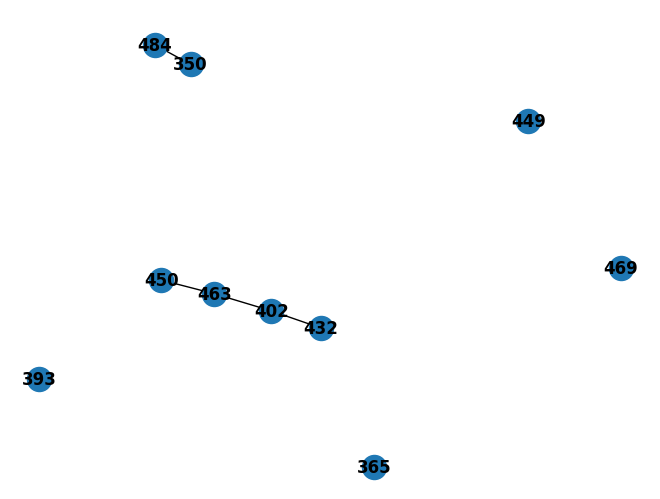

--------------------------------------------------------------------------------------
Create and visualize the subgraph for Twitter



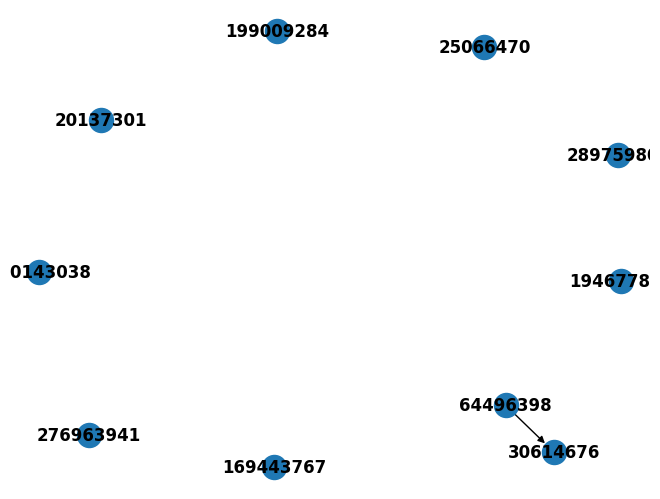

In [11]:
#(a)Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs
#induced on the chosen ten nodes.
def create_and_visualize_subgraph(network, num_nodes=10, visualize=True):
    # Convert set of nodes to a list
    all_nodes = list(network.nodes())

    # Choose ten random nodes
    chosen_nodes = random.sample(all_nodes, num_nodes)

    # Create a subgraph
    subgraph = network.subgraph(chosen_nodes)

    # Visualize the subgraph (optional)
    if visualize:
        nx.draw(subgraph, with_labels=True, font_weight='bold')
        plt.show()

    return subgraph



print("Create and visualize the subgraph for Facebook \n")
subgraph_facebook = create_and_visualize_subgraph(facebook_network)


print("--------------------------------------------------------------------------------------")

print("Create and visualize the subgraph for Twitter\n")
subgraph_twitter = create_and_visualize_subgraph(twitter_network)


In [7]:
#(b) Please list three algorithms for community detection.
print("""Three algorithms that we can use for community detection are:

1. Louvain algorithm: This is a popular algorithm for community detection that optimizes modularity,
       a measure of the quality of a partition of a network into communities.

2. Girvan-Newman algorithm: This algorithm works by iteratively removing edges from the network based on their betweenness centrality,
       which is a measure of how important an edge is for connecting different parts of the network.

3. Label propagation algorithm: This algorithm works by assigning each node in the network to a community based on the communities of its neighbors, 
      and then iteratively updating the community assignments until convergence.
""")

Three algorithms that we can use for community detection are:

1. Louvain algorithm: This is a popular algorithm for community detection that optimizes modularity,
       a measure of the quality of a partition of a network into communities.

2. Girvan-Newman algorithm: This algorithm works by iteratively removing edges from the network based on their betweenness centrality,
       which is a measure of how important an edge is for connecting different parts of the network.

3. Label propagation algorithm: This algorithm works by assigning each node in the network to a community based on the communities of its neighbors, 
      and then iteratively updating the community assignments until convergence.



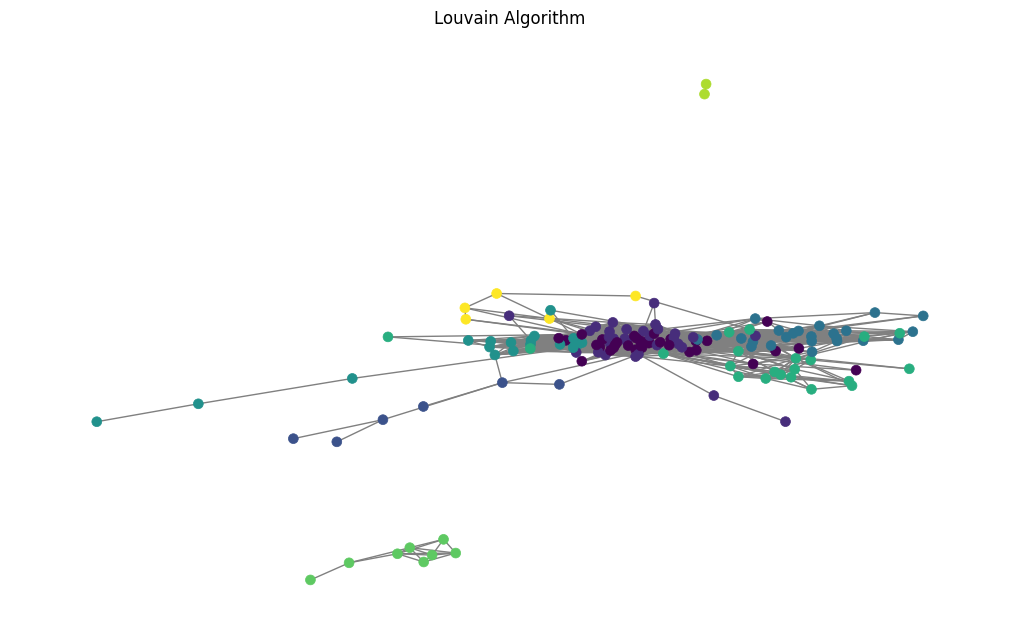

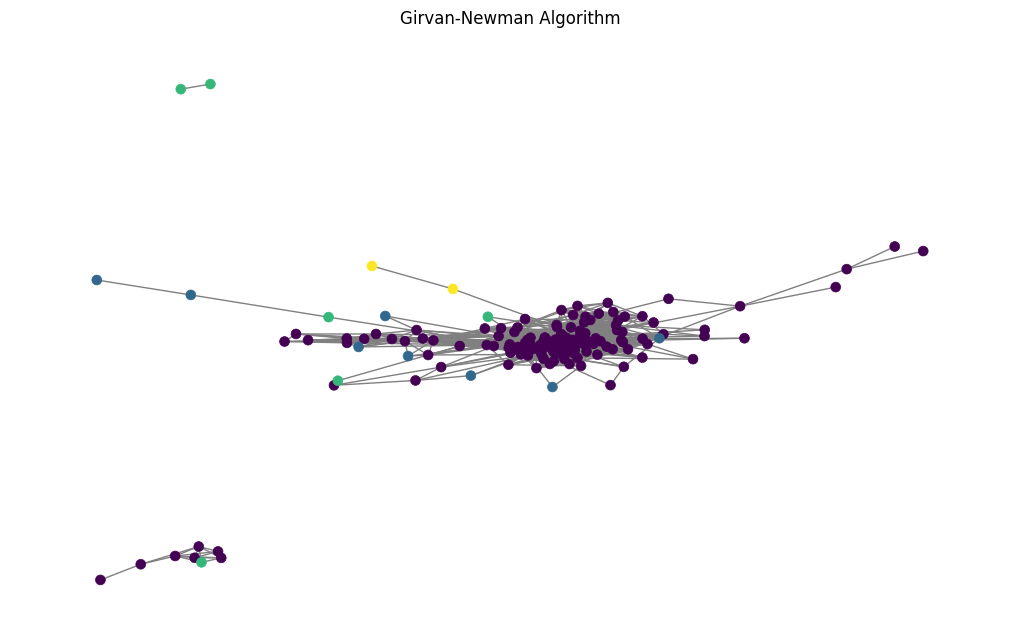

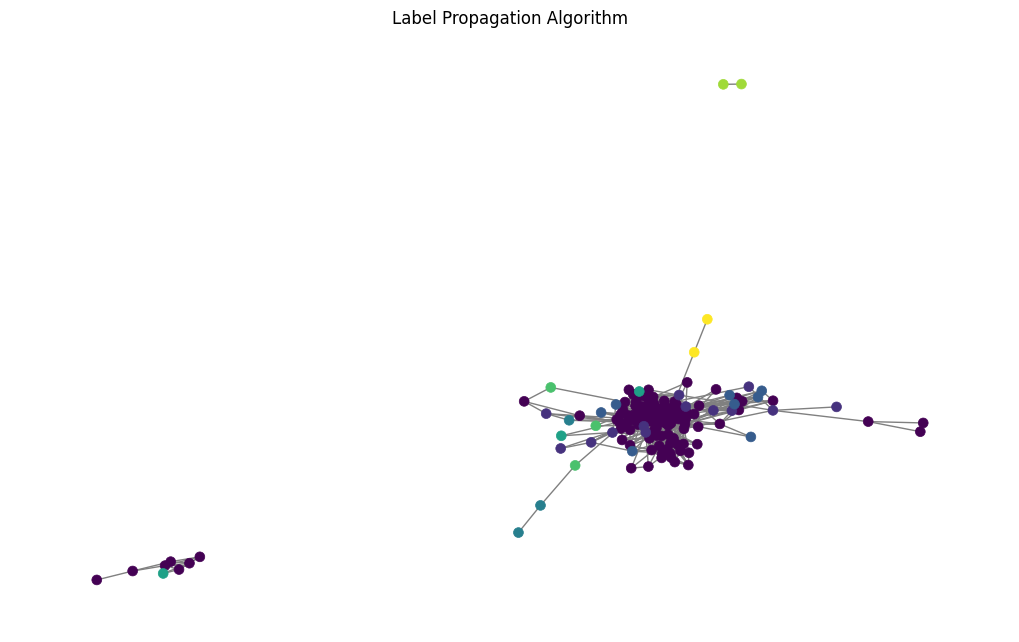

In [21]:
#(c) Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. 
#Please plot graphs to show the communities (mark nodes with different colors / draw communities unions....).

# Apply Louvain algorithm
partition_louvain = community_louvain.best_partition(facebook_network)

# Apply Girvan-Newman algorithm
communities_girvan_newman = next(girvan_newman(facebook_network))

# Apply Label Propagation algorithm
communities_label_propagation = list(label_propagation_communities(facebook_network))

# Plot Louvain communities
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(facebook_network)
nx.draw(
    facebook_network,
    pos,
    node_color=list(partition_louvain.values()),
    with_labels=False,
    cmap=plt.get_cmap('viridis'),  # Use plt.get_cmap instead of cm.get_cmap
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Louvain Algorithm")
plt.show()

# Plot Girvan-Newman communities
plt.figure(figsize=(10, 6))
nx.draw(
    facebook_network,
    node_color=[i for i, comm in enumerate(communities_girvan_newman) for _ in comm],
    with_labels=False,
    cmap=plt.get_cmap('viridis'),  # Use plt.get_cmap instead of cm.get_cmap
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Girvan-Newman Algorithm")
plt.show()

# Plot Label Propagation communities
plt.figure(figsize=(10, 6))
nx.draw(
    facebook_network,
    node_color=[i for i, comm in enumerate(communities_label_propagation) for _ in comm],
    with_labels=False,
    cmap=plt.get_cmap('viridis'),  # Use plt.get_cmap instead of cm.get_cmap
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Label Propagation Algorithm")
plt.show()


In [ ]:
#(d) What are the differences between the community detection results shown in (c)? What are the
#possible reasons?